In [1]:
import importlib

In [2]:
from icet import ClusterExpansion

In [3]:
import disall

In [4]:
%load_ext autoreload
%autoreload 2
importlib.reload(disall)

<module 'disall' (<_frozen_importlib_external._NamespaceLoader object at 0x14586ef38eb0>)>

In [5]:
from disall.ce_parsing import best_integer_composition, make_supercell_cubic

In [6]:
ce = ClusterExpansion.read('ce_four.pkl')
cs = ce.get_cluster_space_copy()
elements = cs.chemical_symbols
prim = cs.primitive_structure

In [7]:
int_comp, size, mnk, comp_diff = best_integer_composition([1/3]*4, min_l=6, conventional= True, prim = prim)

In [8]:
super_structure = make_supercell_cubic(prim, mnk, conventional=True)

In [9]:
from disall.ce_opt import get_args_opt, opt_mc

In [10]:
args = get_args_opt(elements, int_comp, 'MC_00')

In [12]:
args_opt  =  {'no_steps': int(1e4),
    'midpoint': int(0.5e4),
    'interval': 50,
    'ce_supercell': super_structure,
              }

In [13]:
args_opt.update(args)

In [14]:
args_opt

{'no_steps': 10000,
 'midpoint': 5000,
 'interval': 50,
 'ce_supercell': Atoms(symbols='Al864', pbc=True, cell=[21.7575, 21.7575, 21.7575]),
 'concentration': {'Al': 216, 'Co': 216, 'Cr': 216, 'Cu': 216},
 'string_concentration': 'Al0216Co0216Cr0216Cu0216',
 'SRO_keys': [('Al', 'Al'),
  ('Al', 'Co'),
  ('Al', 'Cr'),
  ('Al', 'Cu'),
  ('Co', 'Co'),
  ('Co', 'Cr'),
  ('Co', 'Cu'),
  ('Cr', 'Cr'),
  ('Cr', 'Cu'),
  ('Cu', 'Cu')],
 'directory_logs': 'MC_00/Al0216Co0216Cr0216Cu0216/'}

2025-02-01 03:36:37 - starting opt_mc for Al0216Co0216Cr0216Cu0216

2025-02-01 03:37:09 - subsystem Al0216Co0216Cr0216Cu0216 at [600]K took a time of 31.894205808639526s with an objective value of 0.746236502839303

2025-02-01 03:37:42 - subsystem Al0216Co0216Cr0216Cu0216 at [1200]K took a time of 33.16978168487549s with an objective value of 0.3492093355737935

2025-02-01 03:38:18 - subsystem Al0216Co0216Cr0216Cu0216 at [1800]K took a time of 35.64151430130005s with an objective value of 0.04816166085649054

2025-02-01 03:38:53 - subsystem Al0216Co0216Cr0216Cu0216 at [2400]K took a time of 34.84925651550293s with an objective value of 0.2683209351484672



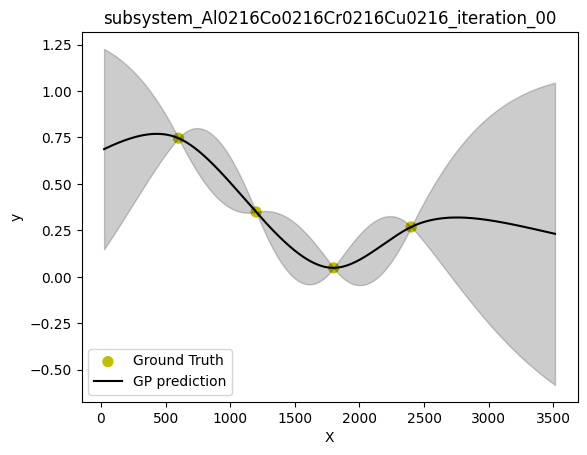

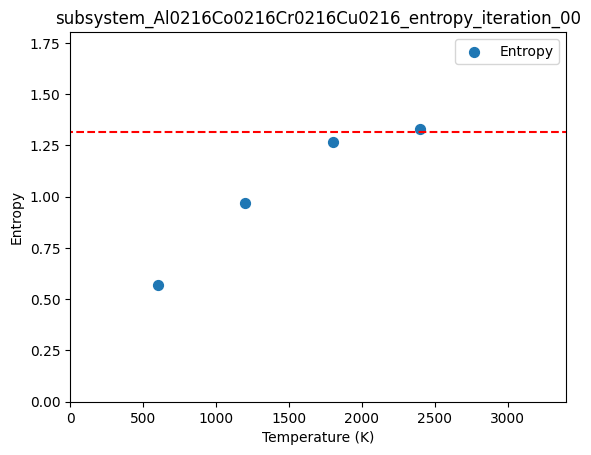

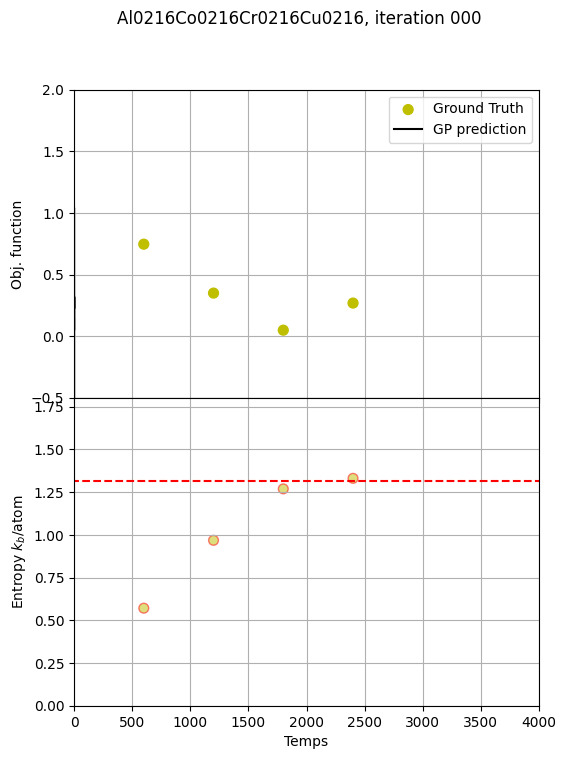

2025-02-01 03:38:55 - subsystem Al0216Co0216Cr0216Cu0216, real values: 
 X = [[ 600]
 [1200]
 [1800]
 [2400]] 
 y = [[0.7462365 ]
 [0.34920934]
 [0.04816166]
 [0.26832094]], scaled values:
 X = [[-1.34164079]
 [-0.4472136 ]
 [ 0.4472136 ]
 [ 1.34164079]]


2025-02-01 03:38:55 - GP train and selection start: 

2025-02-01 03:38:55 - subsystem Al0216Co0216Cr0216Cu0216, iteration 1, x selected = [3.] , in non-scaled x = [[3512.46117975]]

2025-02-01 03:39:32 - subsystem Al0216Co0216Cr0216Cu0216, iteration 1, in non-scaled y obtained = 0.9848634340788331 , 



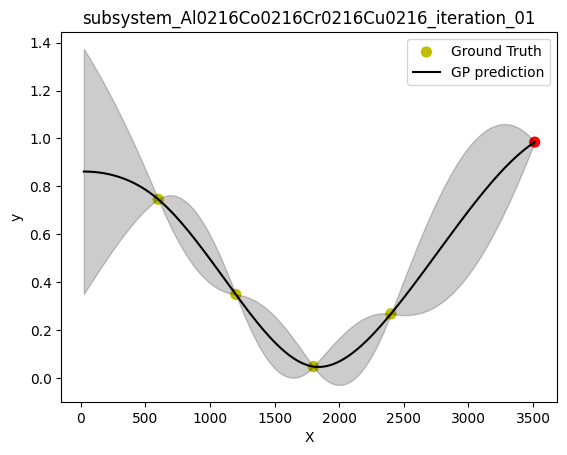

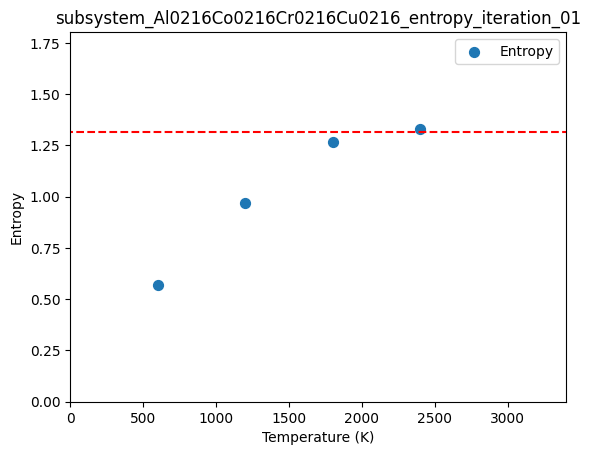

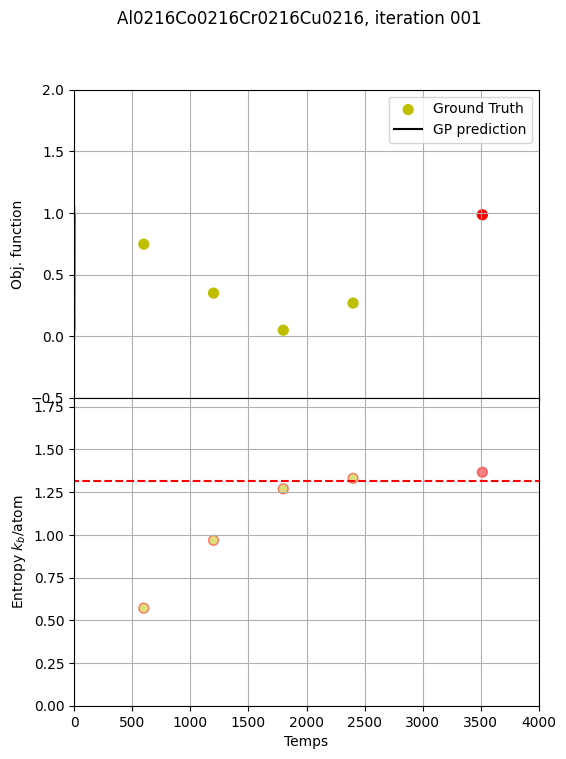

2025-02-01 03:39:35 - subsystem Al0216Co0216Cr0216Cu0216, iteration 2, x selected = [0.74863242] , in non-scaled x = [[2002.19789547]]



In [ ]:
opt_mc(args_opt, ce)